# OMA database Exploration and Analysis
# ===============================

In [1]:
# system imports
import os
import sys

# library imports
import duckdb as ddb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# local imports

## Connecting to OMA db (generated via script)

In [2]:
con = ddb.connect('../tmp/oma.db', read_only=True)

In [3]:
con

In [4]:
con.execute("DESCRIBE").df()

,table_name,column_names,column_types,temporary
0,pairs,"[protein1, protein2]","[VARCHAR, VARCHAR]",False
1,prok_pairs,"[protein1_oma_id, protein2_oma_id, protein1_un...","[VARCHAR, VARCHAR, VARCHAR, VARCHAR]",False
2,proteins,"[description, sequence]","[VARCHAR, VARCHAR]",False
3,uniprot,"[oma_id, uniprot_id, __null_dask_index__]","[VARCHAR, VARCHAR, BIGINT]",False


We have four tables as programmed!

In [5]:
con.execute("SHOW TABLES").df()

,name
0,pairs
1,prok_pairs
2,proteins
3,uniprot


In [6]:
con.execute("DESCRIBE pairs").df()

,column_name,column_type,null,key,default,extra
0,protein1,VARCHAR,YES,NaN,NaN,NaN
1,protein2,VARCHAR,YES,NaN,NaN,NaN


#### Don't do the below

In [ ]:
con.execute("SUMMARIZE pairs").df()

Breaks Kernel. Too big of a compute. (will attach a screenshot below.

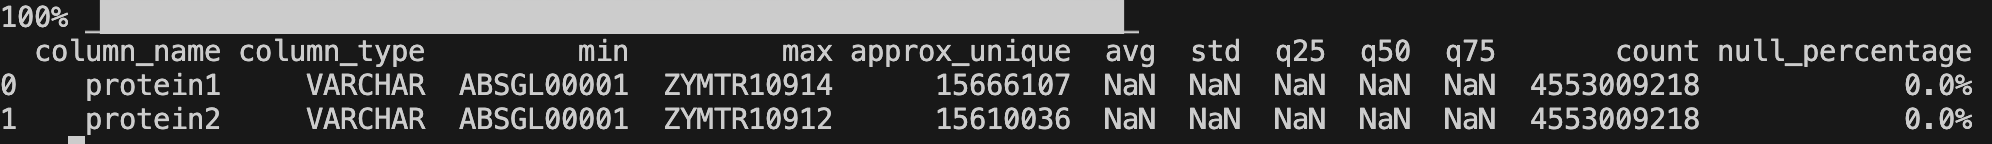

In [8]:
con.execute("SUMMARIZE prok_pairs").df()

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,protein1_oma_id,VARCHAR,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,%
1,protein2_oma_id,VARCHAR,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,%
2,protein1_uniprot_id,VARCHAR,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,%
3,protein2_uniprot_id,VARCHAR,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,%


In [ ]:
con.execute("SUMMARIZE proteins").df()

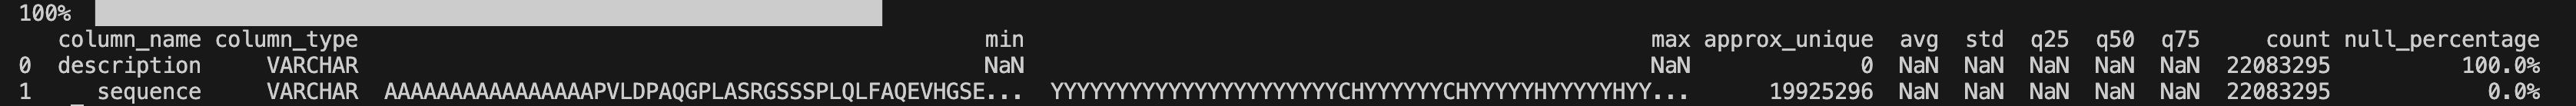

In [7]:
con.execute("SUMMARIZE uniprot").df()

,column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
0,oma_id,VARCHAR,ABSGL00001,ZYMTR09833,12421806,NaN,NaN,NaN,NaN,NaN,13669264,0.0%
1,uniprot_id,VARCHAR,104K_THEAN,ZZZ3_MOUSE,12347480,NaN,NaN,NaN,NaN,NaN,13669264,0.0%
2,__null_dask_index__,BIGINT,0,522081,508944,244401.77013992853,141465.4266976116,122078,243795,364710,13669264,0.0%


### Observations
So the *pairs* table, as expeceted, is the biggest one. It has 4.5 billion protein pairs, while the second biggest table is *proteins* with 22 million elements.

## Analysis
We need statistical tests on the data as well as various viz.

Made a new script for sampling

Things to do:
- sampling negative protien pair space
- scipy false discovery to navigate that space
- use some alignment method to discriminate b/w proteins

In [5]:
# make sure the connection is closed
con.close()